# Finding the temporal autocorrelation order and evidence of slope
# This notebook fits an ARIMA model for ADPE at BIRD

In [1]:
# Load libraries
library(forecast); library(ggplot2);library(dplyr); library(fmsb); library(stats); library(ggplot2); 
library(modelr); library(lmtest); library(pdp)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
# Load the data
master<-read.csv("~/Workspace/Anthropocene/data/MASTER_SIE_MOD.csv")


In [3]:
#calculating the annual percentage change for ADPE_BIRD
master_gr <- master %>% mutate(growth_bird=log(ADPE_BIRD/lag(ADPE_BIRD)))

#excluding years before 2003#
master_gr <- subset(master_gr, !year %in% c(1998:2002))


In [4]:
#adding/scaling additional covariates (e.g., lags) 

#open water/10^6
master_gr$mnOW_RSP6<- master_gr$mnOW_RSP/10^6

#lag 5 years SIE
master_gr <- master_gr %>% mutate(SIE_lag5 = lag(av_SIE,5))
master_gr[5,"SIE_lag5"]<-2.703
master_gr[4,"SIE_lag5"]<-3.123
master_gr[3,"SIE_lag5"]<-2.731
master_gr[2,"SIE_lag5"]<-2.767
master_gr[1,"SIE_lag5"]<-2.60

#lag 4 years SIE
master_gr <- master_gr %>% mutate(SIE_lag4 = lag(av_SIE,4))
master_gr[4,"SIE_lag4"]<-2.703
master_gr[3,"SIE_lag4"]<-3.123
master_gr[2,"SIE_lag4"]<-2.731
master_gr[1,"SIE_lag4"]<-2.767


#lag 4 years Gyre
master_gr <- master_gr %>% mutate(GyreSPD_lag4 = lag(GyreSPD,4))
master_gr[4,"GyreSPD_lag4"]<-6.2
master_gr[3,"GyreSPD_lag4"]<-6.3
master_gr[2,"GyreSPD_lag4"]<-5.7
master_gr[1,"GyreSPD_lag4"]<-5.8

#lag 5 years Gyre
master_gr <- master_gr %>% mutate(GyreSPD_lag5 = lag(GyreSPD,5))
master_gr[5,"GyreSPD_lag5"]<-6.2
master_gr[4,"GyreSPD_lag5"]<-6.3
master_gr[3,"GyreSPD_lag5"]<-5.7
master_gr[2,"GyreSPD_lag5"]<-5.8
master_gr[1,"GyreSPD_lag5"]<-5.0

#lag 5 years Air Temp
master_gr <- master_gr %>% mutate(mnAirTemp_lag5 = lag(mnAirTemp,5))
master_gr[5,"mnAirTemp_lag5"]<--5.6
master_gr[4,"mnAirTemp_lag5"]<--4.5
master_gr[3,"mnAirTemp_lag5"]<--5.2
master_gr[2,"mnAirTemp_lag5"]<--7.7
master_gr[1,"mnAirTemp_lag5"]<--4.2

#lag 4 years Air Temp
master_gr <- master_gr %>% mutate(mnAirTemp_lag4 = lag(mnAirTemp,4))
master_gr[5,"mnAirTemp_lag4"]<--5.6
master_gr[4,"mnAirTemp_lag4"]<--4.5
master_gr[3,"mnAirTemp_lag4"]<--5.2
master_gr[2,"mnAirTemp_lag4"]<--7.7

#lag 5 years SST
master_gr <- master_gr %>% mutate(nmSST_aw_RSP_lag5 = lag(nmSST_aw_RSP,5))
master_gr[5,"nmSST_aw_RSP_lag5"]<--1.11723
master_gr[4,"nmSST_aw_RSP_lag5"]<--0.645706
master_gr[3,"nmSST_aw_RSP_lag5"]<--0.924639
master_gr[2,"nmSST_aw_RSP_lag5"]<--0.901666
master_gr[1,"nmSST_aw_RSP_lag5"]<--0.690398

#lag 4 years SST
master_gr <- master_gr %>% mutate(nmSST_aw_RSP_lag4 = lag(nmSST_aw_RSP,4))
master_gr[4,"nmSST_aw_RSP_lag4"]<--1.11723
master_gr[3,"nmSST_aw_RSP_lag4"]<--0.645706
master_gr[2,"nmSST_aw_RSP_lag4"]<--0.924639
master_gr[1,"nmSST_aw_RSP_lag4"]<--0.901666

#lag 5 years Wind
master_gr <- master_gr %>% mutate(mnWind_lag5 = lag(mnWind,5))
master_gr[5,"mnWind_lag5"]<-8.8
master_gr[4,"mnWind_lag5"]<-8.6
master_gr[3,"mnWind_lag5"]<-7.8
master_gr[2,"mnWind_lag5"]<-7.8
master_gr[1,"mnWind_lag5"]<-7.8

#lag 4 years Wind
master_gr <- master_gr %>% mutate(mnWind_lag4 = lag(mnWind,4))
master_gr[4,"mnWind_lag4"]<-8.8
master_gr[3,"mnWind_lag4"]<-8.6
master_gr[2,"mnWind_lag4"]<-7.8
master_gr[1,"mnWind_lag4"]<-7.8

#mnOW_RSP6
master_gr$mnOW_RSP6<- master_gr$mnOW_RSP/10^6

#lag 5 years mnOW_RSP6
master_gr <- master_gr %>% mutate(mnOW_RSP6_lag5 = lag(mnOW_RSP6,5))
master_gr[5,"mnOW_RSP6_lag5"]<-100918/10^6
master_gr[4,"mnOW_RSP6_lag5"]<-250135/10^6
master_gr[3,"mnOW_RSP6_lag5"]<-200943/10^6
master_gr[2,"mnOW_RSP6_lag5"]<-218399/10^6
master_gr[1,"mnOW_RSP6_lag5"]<-250157/10^6

#lag 4 years mnOW_RSP6
master_gr <- master_gr %>% mutate(mnOW_RSP6_lag4 = lag(mnOW_RSP6,4))
master_gr[4,"mnOW_RSP6_lag4"]<-100918/10^6
master_gr[3,"mnOW_RSP6_lag4"]<-250135/10^6
master_gr[2,"mnOW_RSP6_lag4"]<-200943/10^6
master_gr[1,"mnOW_RSP6_lag4"]<-218399/10^6

#lag 4 years mnOW_RSP6
master_gr <- master_gr %>% mutate(mnOW_RSP6_lag4 = lag(mnOW_RSP6,4))
master_gr[4,"mnOW_RSP6_lag4"]<-100918/10^6
master_gr[3,"mnOW_RSP6_lag4"]<-250135/10^6
master_gr[2,"mnOW_RSP6_lag4"]<-200943/10^6
master_gr[1,"mnOW_RSP6_lag4"]<-218399/10^6

#lag 4 years OW_days_RSP
master_gr <- master_gr %>% mutate(OW_day_RSPlag4 = lag(OW_day_RSP,4))
master_gr[4,"OW_day_RSPlag4"]<-9
master_gr[3,"OW_day_RSPlag4"]<-2
master_gr[2,"OW_day_RSPlag4"]<-4
master_gr[1,"OW_day_RSPlag4"]<-8

#lag 4 years OW_days_MCM
master_gr <- master_gr %>% mutate(OW_day_MCMlag4 = lag(logOW_day_MCM,4))
master_gr[4,"OW_day_MCMlag4"]<-5.308267697
master_gr[3,"OW_day_MCMlag4"]<-4.912654886
master_gr[2,"OW_day_MCMlag4"]<-5.209486153
master_gr[1,"OW_day_MCMlag4"]<-5.220355825


In [5]:
#Adding quadratic variables
master_gr$av_SIE_2<- master_gr$av_SIE^2
master_gr$SIE_lag4_2<- master_gr$SIE_lag4^2
master_gr$SIE_lag5_2<- master_gr$SIE_lag5^2
master_gr$mnOW_RSP6<- master_gr$mnOW_RSP/10^6
master_gr$mnOW_MCM6<- master_gr$mnOW_MCM/10^6
master_gr$mnOW_RSP6_2<-master_gr$mnOW_RSP6^2
master_gr$mnOW_RSP6_lag4_2<-master_gr$mnOW_RSP6_lag4^2
master_gr$mnOW_RSP6_lag5_2<-master_gr$mnOW_RSP6_lag5^2
master_gr$mnChl_aw_RSP_2<-master_gr$mnChl_aw_RSP^2
master_gr$nmSST_aw_RSP_2<-master_gr$nmSST_aw_RSP^2
master_gr$nmSST_aw_RSP_lag4_2<-master_gr$nmSST_aw_RSP_lag4^2
master_gr$nmSST_aw_RSP_lag5_2<-master_gr$nmSST_aw_RSP_lag5^2
master_gr$mnWind_2<-master_gr$mnWind^2
master_gr$mnWind_lag4_2<-master_gr$mnWind_lag4^2
master_gr$mnWind_lag5_2<-master_gr$mnWind_lag5^2
master_gr$GyreSPD_2<-master_gr$GyreSPD^2
master_gr$GyreSPD_lag4_2<-master_gr$GyreSPD_lag4^2
master_gr$GyreSPD_lag5_2<-master_gr$GyreSPD_lag5^2
master_gr$Salinity_2<-master_gr$Salinity^2
master_gr$intP_RSP_2<-master_gr$intP_RSP^2
master_gr$Prop._134_2<-master_gr$Prop._134^2
master_gr$TOTALTonnes.100_2<-master_gr$TOTALTonnes.100^2
master_gr$mnSIE_2<- master_gr$mnSIE^2
master_gr$mnAirTemp_2<- master_gr$mnAirTemp^2
master_gr$mnAirTemp_lag4_2<- master_gr$mnAirTemp_lag4^2
master_gr$mnAirTemp_lag5_2<- master_gr$mnAirTemp_lag5^2
master_gr$logOW_day_MCM_2<- master_gr$logOW_day_MCM^2
master_gr$OW_day_MCMlag4_2<- master_gr$OW_day_MCMlag4^2
master_gr$OW_day_RSPlag4_2<- master_gr$OW_day_RSPlag4^2
master_gr$OW_day_RSP_2<- master_gr$OW_day_RSP^2

# ARIMA

In [6]:
#Including the trace function to understand the combination of p,d,q that arima checked to select the best model#
amdl<-auto.arima(master_gr$growth_bird,ic="aic", trace=TRUE)


 ARIMA(2,0,2) with non-zero mean : Inf
 ARIMA(0,0,0) with non-zero mean : 9.225962
 ARIMA(1,0,0) with non-zero mean : 9.327103
 ARIMA(0,0,1) with non-zero mean : Inf
 ARIMA(0,0,0) with zero mean     : 7.396489
 ARIMA(1,0,1) with non-zero mean : Inf

 Best model: ARIMA(0,0,0) with zero mean     



In [7]:
#checking best model
mdl1<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=T)
summary(mdl1)

Series: master_gr$growth_bird 
ARIMA(1,0,0) with drift 

Coefficients:
          ar1   drift
      -0.3343  0.0020
s.e.   0.2623  0.0054

sigma^2 estimated as 0.08428:  log likelihood=-1.91
AIC=9.81   AICc=11.81   BIC=12.13

Training set error measures:
                     ME      RMSE      MAE      MPE     MAPE      MASE
Training set 0.01907064 0.2715676 0.199199 51.12156 180.8103 0.5631151
                    ACF1
Training set -0.06627433



	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with drift
Q* = 7.6, df = 3, p-value = 0.05504

Model df: 2.   Total lags used: 5



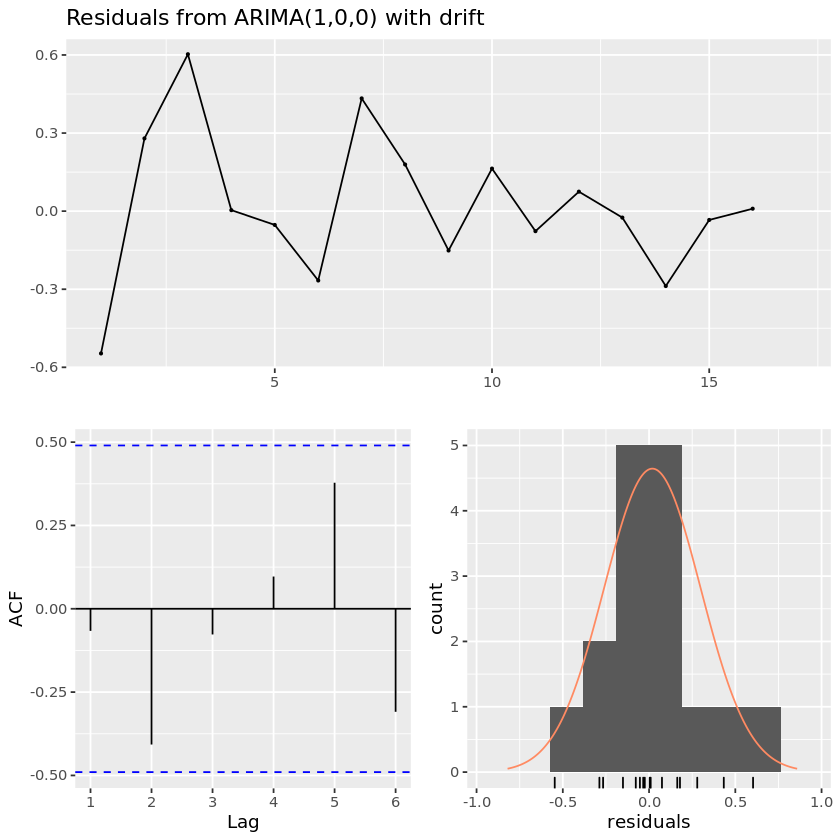

In [8]:
checkresiduals(mdl1)

In [9]:
# Compare to:
mdl1a<-Arima(master_gr$growth_bird,order=c(2,0,0),include.mean=F,include.drift=T)
summary(mdl1a)

Series: master_gr$growth_bird 
ARIMA(2,0,0) with drift 

Coefficients:
          ar1      ar2   drift
      -0.3835  -0.4257  0.0018
s.e.   0.2494   0.2555  0.0038

sigma^2 estimated as 0.07639:  log likelihood=-0.7
AIC=9.41   AICc=13.04   BIC=12.5

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.03140492 0.2491245 0.2110308 199.5566 290.0398 0.5965622
                    ACF1
Training set -0.09129029



	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with drift
Q* = 8.6284, df = 3, p-value = 0.03466

Model df: 3.   Total lags used: 6



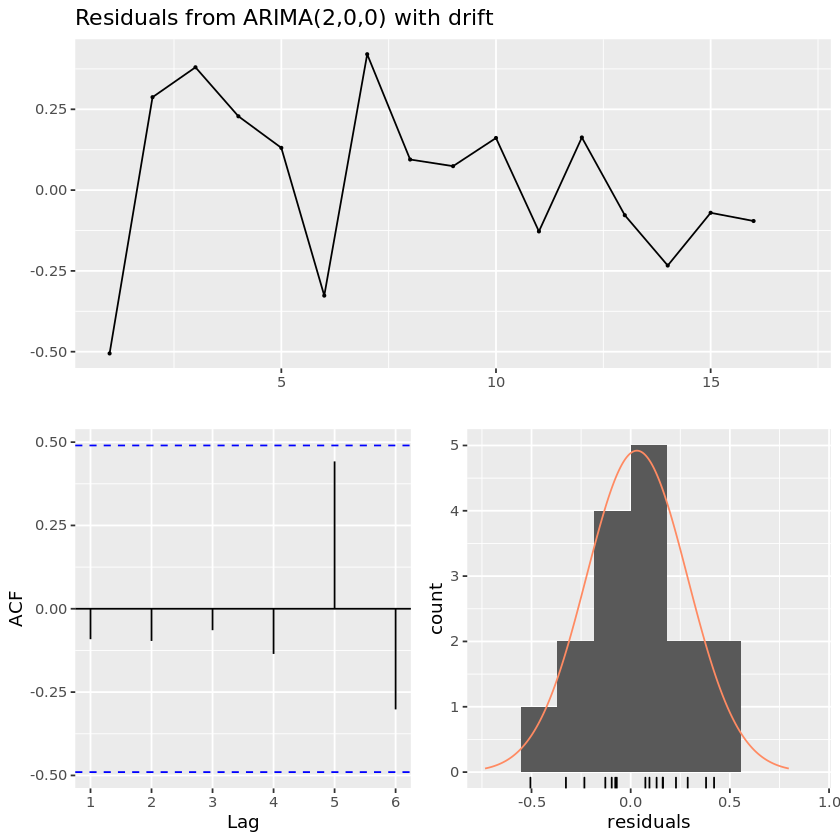

In [10]:
checkresiduals(mdl1a)

# Plotting the correct trend

In [11]:
adcroz<-master_gr$growth_bird
names(adcroz)<-master_gr$year

Warning message:
“Removed 1 rows containing missing values (geom_point).”


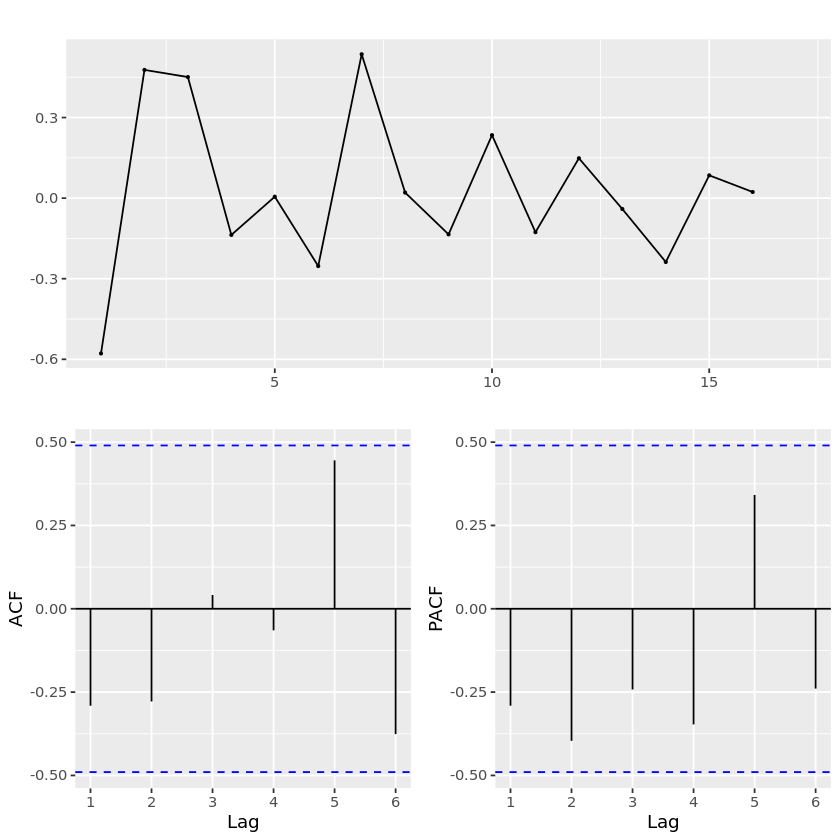

In [12]:
# Uncorrected trend
ggtsdisplay(adcroz)

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


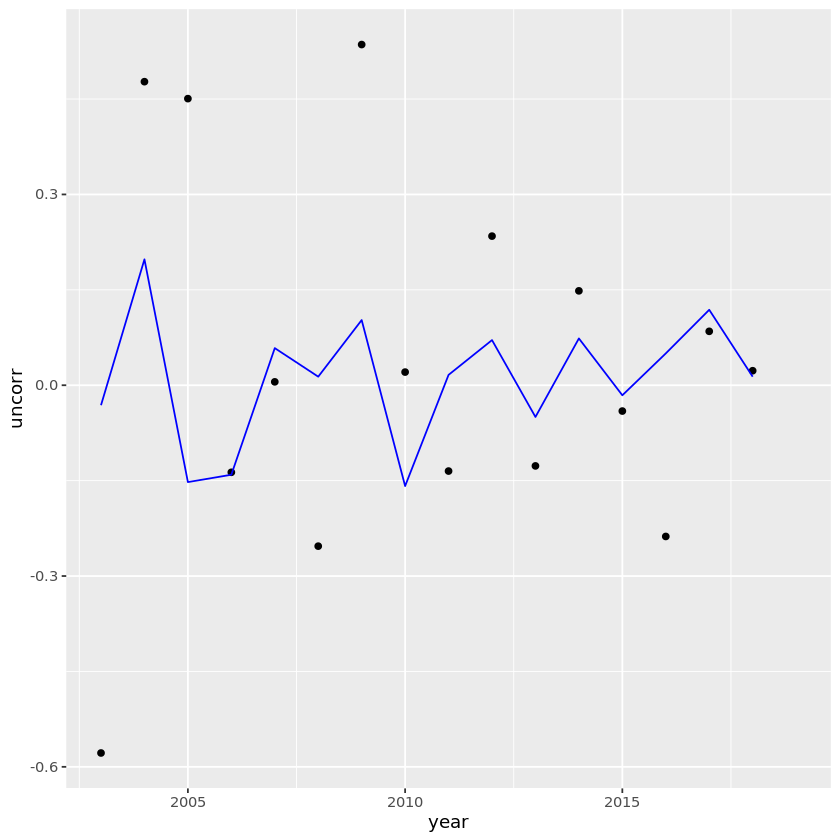

In [13]:
pdf<-data.frame(year=master_gr$year,uncorr=mdl1$x,corr=fitted(mdl1))
ggplot(pdf,aes(x=year,y=uncorr)) + geom_point() + geom_line(aes(y=corr),color="blue")

## On the Fish cumulative covariate values explored
Fish= Total Tonnes * Perc.134/100  
Fish_cum3; 3 years cumulative, no weights  
Fish_cum_8_9_1; 3 years cumulative, weights: 80%, 90% ,100%  
Fish_cum_6_8_1; 3 years cumulative, weights: 60%, 80% ,100%  
Fish_cum_75_1; 2 years cumulative, weights: 75%, 100%  
Fish_cum2; 2 years cumulative, no weights  
Fish_cum_5_1; 2 years cumulative, weights: 50%, 100%  
Fish_cum_4_1; 2 years cumulative, weights: 40%, 100%  
Fish_cum_2_1; 2 years cumulative, weights: 20%, 100%

## A note on Chl and productivity
Chl, and Productivity were not included in the saturated model, specially because how difficult is to give a rationale to link productivity with anything at the Ross Sea. Instead we will add them as last step in our models

In [14]:
#correlation test
test <- cor.test(master_gr$nmSST_aw_RSP, master_gr$mnOW_RSP6, method= "spearman")
test


	Spearman's rank correlation rho

data:  master_gr$nmSST_aw_RSP and master_gr$mnOW_RSP6
S = 240, p-value = 0.008217
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6470588 


#  Saturated model

In [15]:
#not including fish variable here, the model converges
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "GyreSPD", "mnWind", 
                              "nmSST_aw_RSP","mnAirTemp", "Fish_cum3")]) # , "mnOW_RSP6"
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1   av_SIE  GyreSPD  mnWind  nmSST_aw_RSP  mnAirTemp  Fish_cum3
      -0.6729  -0.1237   0.0689  0.0907        1.0364     0.0882     0.0181
s.e.   0.1807   0.2278   0.0540  0.1035        0.3169     0.0745     0.0059

sigma^2 estimated as 0.06411:  log likelihood=3.73
AIC=8.53   AICc=32.53   BIC=14.2

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.006792587 0.1849076 0.1625341 258.5535 313.9719 0.4594671
                   ACF1
Training set -0.3345306


In [16]:
coeftest(mdlsat)


z test of coefficients:

               Estimate Std. Error z value  Pr(>|z|)    
ar1          -0.6728890  0.1807497 -3.7228 0.0001971 ***
av_SIE       -0.1237250  0.2277894 -0.5432 0.5870229    
GyreSPD       0.0688728  0.0539850  1.2758 0.2020340    
mnWind        0.0907051  0.1035332  0.8761 0.3809778    
nmSST_aw_RSP  1.0363849  0.3169204  3.2702 0.0010748 ** 
mnAirTemp     0.0882127  0.0744997  1.1841 0.2363861    
Fish_cum3     0.0181283  0.0059063  3.0693 0.0021456 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [17]:
#checking lag4
cov_sat_growth<-as.matrix(master_gr[,c("SIE_lag4", "GyreSPD",  
                              "nmSST_aw_RSP","mnAirTemp", "Fish_cum3")]) # , "mnOW_RSP6" "Wind"
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  SIE_lag4  GyreSPD  nmSST_aw_RSP  mnAirTemp  Fish_cum3
      -0.7049   -0.0754   0.1150        0.9050     0.0365     0.0172
s.e.   0.1707    0.1243   0.0431        0.2687     0.0492     0.0051

sigma^2 estimated as 0.05819:  log likelihood=3.53
AIC=6.93   AICc=22.93   BIC=11.89

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE     MASE
Training set -0.006691498 0.1868518 0.1646763 246.3428 328.0506 0.465523
                   ACF1
Training set -0.4131653


In [18]:
coeftest(mdlsat) #lag 4 works better (lower AIC)


z test of coefficients:

               Estimate Std. Error z value  Pr(>|z|)    
ar1          -0.7048788  0.1707186 -4.1289 3.645e-05 ***
SIE_lag4     -0.0754335  0.1243425 -0.6067 0.5440772    
GyreSPD       0.1150435  0.0431213  2.6679 0.0076325 ** 
nmSST_aw_RSP  0.9049828  0.2686853  3.3682 0.0007566 ***
mnAirTemp     0.0364680  0.0492398  0.7406 0.4589235    
Fish_cum3     0.0172379  0.0050754  3.3964 0.0006829 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [19]:
#checking lags
cov_sat_growth<-as.matrix(master_gr[,c("SIE_lag4", "GyreSPD",  
                              "nmSST_aw_RSP","mnAirTemp_lag5", "Fish_cum3")]) # , "mnOW_RSP6" "Wind"
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  SIE_lag4  GyreSPD  nmSST_aw_RSP  mnAirTemp_lag5  Fish_cum3
      -0.6832   -0.2400   0.1001        0.8894         -0.0780     0.0154
s.e.   0.1792    0.1409   0.0409        0.2487          0.0502     0.0050

sigma^2 estimated as 0.05203:  log likelihood=4.4
AIC=5.19   AICc=21.19   BIC=10.15

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.005425016 0.1766789 0.1462036 140.9409 208.2059 0.4133023
                   ACF1
Training set -0.4268511


In [20]:
coeftest(mdlsat)


z test of coefficients:

                 Estimate Std. Error z value  Pr(>|z|)    
ar1            -0.6832016  0.1792279 -3.8119 0.0001379 ***
SIE_lag4       -0.2400229  0.1409316 -1.7031 0.0885464 .  
GyreSPD         0.1000974  0.0408839  2.4483 0.0143518 *  
nmSST_aw_RSP    0.8894151  0.2487017  3.5762 0.0003486 ***
mnAirTemp_lag5 -0.0780456  0.0502313 -1.5537 0.1202500    
Fish_cum3       0.0154363  0.0049507  3.1180 0.0018206 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [21]:
#excluding AirTemp
cov_sat_growth<-as.matrix(master_gr[,c("SIE_lag4", "GyreSPD",  
                              "nmSST_aw_RSP", "Fish_cum3")]) # , "mnOW_RSP6" "Wind" "mnAirTemp_lag5",
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  SIE_lag4  GyreSPD  nmSST_aw_RSP  Fish_cum3
      -0.6859   -0.1051   0.1078        0.9672     0.0169
s.e.   0.1747    0.1208   0.0434        0.2614     0.0052

sigma^2 estimated as 0.05444:  log likelihood=3.27
AIC=5.46   AICc=15.96   BIC=9.71

Training set error measures:
                       ME      RMSE       MAE      MPE    MAPE      MASE
Training set -0.006469898 0.1905096 0.1677245 160.6685 242.537 0.4741398
                   ACF1
Training set -0.4117844


In [22]:
coeftest(mdlsat)


z test of coefficients:

               Estimate Std. Error z value  Pr(>|z|)    
ar1          -0.6858918  0.1746948 -3.9262 8.629e-05 ***
SIE_lag4     -0.1050562  0.1207608 -0.8700  0.384326    
GyreSPD       0.1077664  0.0433689  2.4849  0.012960 *  
nmSST_aw_RSP  0.9671794  0.2614304  3.6996  0.000216 ***
Fish_cum3     0.0168954  0.0052013  3.2483  0.001161 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [23]:
#excluding SIE

cov_sat_growth<-as.matrix(master_gr[,c("GyreSPD",  
                              "nmSST_aw_RSP", "Fish_cum3")]) # , "mnOW_RSP6" "Wind" "mnAirTemp_lag5",
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  GyreSPD  nmSST_aw_RSP  Fish_cum3
      -0.6500   0.0752        1.0186     0.0150
s.e.   0.1835   0.0237        0.2635     0.0049

sigma^2 estimated as 0.05221:  log likelihood=2.91
AIC=4.18   AICc=10.84   BIC=7.72

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.008244501 0.1956622 0.1736506 154.1912 242.9052 0.4908923
                   ACF1
Training set -0.3790451


In [24]:
coeftest(mdlsat)


z test of coefficients:

               Estimate Std. Error z value  Pr(>|z|)    
ar1          -0.6499574  0.1835489 -3.5411 0.0003985 ***
GyreSPD       0.0752450  0.0236760  3.1781 0.0014824 ** 
nmSST_aw_RSP  1.0185891  0.2635459  3.8649 0.0001111 ***
Fish_cum3     0.0149685  0.0049028  3.0530 0.0022653 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [25]:
#including OW and OW_day

cov_sat_growth<-as.matrix(master_gr[,c("GyreSPD",  
                              "OW_day_RSP", "Fish_cum3")]) # , "mnOW_RSP6" "Wind" "mnAirTemp_lag5",
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  GyreSPD  OW_day_RSP  Fish_cum3
      -0.5668   0.0238     -0.0217     0.0021
s.e.   0.2323   0.0203      0.0092     0.0044

sigma^2 estimated as 0.07498:  log likelihood=0.28
AIC=9.44   AICc=16.11   BIC=12.98

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.01751903 0.2344854 0.1921342 148.4912 214.1854 0.5431436
                   ACF1
Training set -0.1230496


In [26]:
coeftest(mdlsat)


z test of coefficients:

             Estimate Std. Error z value Pr(>|z|)  
ar1        -0.5667569  0.2322516 -2.4403  0.01468 *
GyreSPD     0.0237828  0.0202541  1.1742  0.24031  
OW_day_RSP -0.0217174  0.0091938 -2.3622  0.01817 *
Fish_cum3   0.0021377  0.0043963  0.4863  0.62679  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [27]:
#Including Productivity (int_P) and Chl
#BOTH "non-significant" and the model doesn't improve more than 2 AIC

cov_sat_growth<-as.matrix(master_gr[,c("GyreSPD",  
                              "nmSST_aw_RSP", "Fish_cum3", "intP_RSP")]) # , "mnOW_RSP6" "Wind" "mnAirTemp_lag5",
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)


Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  GyreSPD  nmSST_aw_RSP  Fish_cum3  intP_RSP
      -0.6511   0.0558        1.0389     0.0139    0.2898
s.e.   0.1844   0.0416        0.2619     0.0052    0.5147

sigma^2 estimated as 0.05623:  log likelihood=3.07
AIC=5.86   AICc=16.36   BIC=10.11

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.009046641 0.1936102 0.1716363 114.6241 210.6973 0.4851981
                   ACF1
Training set -0.3906088


In [28]:
coeftest(mdlsat)


z test of coefficients:

               Estimate Std. Error z value  Pr(>|z|)    
ar1          -0.6511474  0.1843733 -3.5317 0.0004129 ***
GyreSPD       0.0558226  0.0416440  1.3405 0.1800917    
nmSST_aw_RSP  1.0389330  0.2619006  3.9669 7.281e-05 ***
Fish_cum3     0.0138870  0.0052152  2.6628 0.0077491 ** 
intP_RSP      0.2897679  0.5147116  0.5630 0.5734543    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [29]:
#INTERCEPT ONLY
cov_sat_growth<-as.matrix(master_gr[,c(1)]) # , "mnOW_RSP6" "Wind" "mnAirTemp_lag5",
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F)
summary(mdlsat)

Series: master_gr$growth_bird 
ARIMA(1,0,0) with zero mean 

Coefficients:
          ar1
      -0.3267
s.e.   0.2626

sigma^2 estimated as 0.07936:  log likelihood=-1.97
AIC=7.95   AICc=8.87   BIC=9.49

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.04064371 0.2727634 0.1989666 79.78886 175.5433 0.5624579
                    ACF1
Training set -0.09217139


In [30]:
#checking quadratics

cov_sat_growth<-as.matrix(master_gr[,c("GyreSPD","nmSST_aw_RSP",
                               "Fish_cum3")]) # , "mnOW_RSP6" "Wind" "mnAirTemp_lag5",
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  GyreSPD  nmSST_aw_RSP  Fish_cum3
      -0.6500   0.0752        1.0186     0.0150
s.e.   0.1835   0.0237        0.2635     0.0049

sigma^2 estimated as 0.05221:  log likelihood=2.91
AIC=4.18   AICc=10.84   BIC=7.72

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.008244501 0.1956622 0.1736506 154.1912 242.9052 0.4908923
                   ACF1
Training set -0.3790451


Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


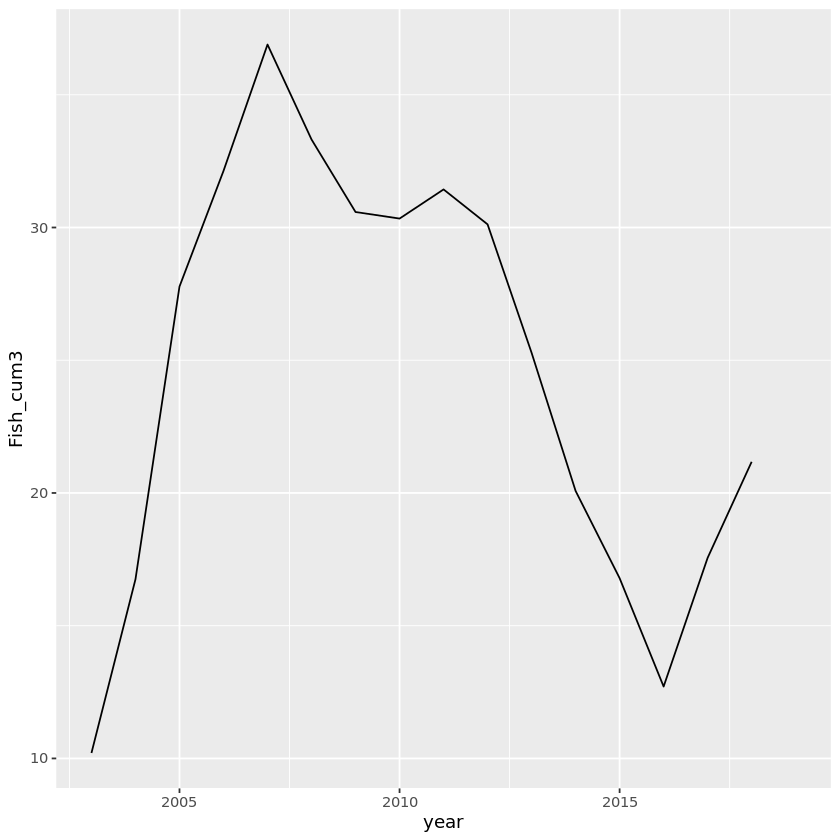

In [31]:
ggplot(master_gr,aes(x=year,y=Fish_cum3)) + geom_line()

In [32]:
coeftest(mdlsat)


z test of coefficients:

               Estimate Std. Error z value  Pr(>|z|)    
ar1          -0.6499574  0.1835489 -3.5411 0.0003985 ***
GyreSPD       0.0752450  0.0236760  3.1781 0.0014824 ** 
nmSST_aw_RSP  1.0185891  0.2635459  3.8649 0.0001111 ***
Fish_cum3     0.0149685  0.0049028  3.0530 0.0022653 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [33]:
#trying different Fish percentages
#Fish_cum_8_9_1; 3 years cumulative, weights: 80%, 90% ,100%
#Fish_cum_6_8_1; 3 years cumulative, weights: 60%, 80% ,100%
#Fish_cum_75_1; 2 years cumulative, weights: 75%, 100%
#Fish_cum2; 2 years cumulative, no weights
#Fish_cum_5_1; 2 years cumulative, weights: 50%, 100%
#Fish_cum_4_1; 2 years cumulative, weights: 40%, 100%
#Fish_cum_2_1; 2 years cumulative, weights: 20%, 100%

cov_sat_growth<-as.matrix(master_gr[,c("GyreSPD","nmSST_aw_RSP",
                               "Fish_cum_8_9_1")]) # , "mnOW_RSP6" "Wind" "mnAirTemp_lag5",
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  GyreSPD  nmSST_aw_RSP  Fish_cum_8_9_1
      -0.6531   0.0740        1.0121          0.0167
s.e.   0.1830   0.0235        0.2599          0.0054

sigma^2 estimated as 0.05188:  log likelihood=2.95
AIC=4.09   AICc=10.76   BIC=7.63

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.008484049 0.1950573 0.1739336 141.3941 233.8768 0.4916922
                   ACF1
Training set -0.3839082


In [34]:
coeftest(mdlsat)


z test of coefficients:

                 Estimate Std. Error z value  Pr(>|z|)    
ar1            -0.6530779  0.1830166 -3.5684 0.0003592 ***
GyreSPD         0.0739812  0.0234722  3.1519 0.0016223 ** 
nmSST_aw_RSP    1.0120626  0.2599277  3.8936 9.875e-05 ***
Fish_cum_8_9_1  0.0167324  0.0054291  3.0820 0.0020562 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Checking for correlations

In [35]:
in_frame <- master_gr %>% select (mnSIE, SIE_lag4, GyreSPD, GyreSPD_lag4, mnWind, nmSST_aw_RSP, Fish_cum3, mnAirTemp_lag4, mnOW_RSP6)

In [36]:
##### threshold at 10 (it’s equivalent to explaining 99% of the information in a variable by the set of the other covariates).

#select covariates based on variance inflation

vif_func<-function(in_frame,thresh=10,trace=T,...){
  
  
  
  if(class(in_frame) != 'data.frame') in_frame<-data.frame(in_frame)
  
  
  
  #get initial vif value for all comparisons of variables
  
  vif_init<-NULL
  
  var_names <- names(in_frame)
  
  for(val in var_names){
    
    regressors <- var_names[-which(var_names == val)]
    
    form <- paste(regressors, collapse = '+')
    
    form_in <- formula(paste(val, '~', form))
    
    vif_init<-rbind(vif_init, c(val, VIF(lm(form_in, data = in_frame, ...))))
    
  }
  
  vif_max<-max(as.numeric(vif_init[,2]), na.rm = TRUE)
  
  
  
  if(vif_max < thresh){
    
    if(trace==T){ #print output of each iteration
      
      prmatrix(vif_init,collab=c('var','vif'),rowlab=rep('',nrow(vif_init)),quote=F)
      
      cat('\n')
      
      cat(paste('All variables have VIF < ', thresh,', max VIF ',round(vif_max,2), sep=''),'\n\n')
      
    }
    
    return(var_names)
    
  }
  
  else{
    
    
    
    in_dat<-in_frame
    
    
    
    #backwards selection of explanatory variables, stops when all VIF values are below 'thresh'
    
    while(vif_max >= thresh){
      
      
      
      vif_vals<-NULL
      
      var_names <- names(in_dat)
      
      
      
      for(val in var_names){
        
        regressors <- var_names[-which(var_names == val)]
        
        form <- paste(regressors, collapse = '+')
        
        form_in <- formula(paste(val, '~', form))
        
        vif_add<-VIF(lm(form_in, data = in_dat, ...))
        
        vif_vals<-rbind(vif_vals,c(val,vif_add))
        
      }
      
      max_row<-which(vif_vals[,2] == max(as.numeric(vif_vals[,2]), na.rm = TRUE))[1]
      
      
      
      vif_max<-as.numeric(vif_vals[max_row,2])
      
      
      
      if(vif_max<thresh) break
      
      
      
      if(trace==T){ #print output of each iteration
        
        prmatrix(vif_vals,collab=c('var','vif'),rowlab=rep('',nrow(vif_vals)),quote=F)
        
        cat('\n')
        
        cat('removed: ',vif_vals[max_row,1],vif_max,'\n\n')
        
        flush.console()
        
      }
      
      
      
      in_dat<-in_dat[,!names(in_dat) %in% vif_vals[max_row,1]]
      
      
      
    }
    
    
    
    return(names(in_dat))
    
    
    
  }
  
  
  
}
  
vif_func(in_frame,thresh=10,trace=T)

 var            vif             
 mnSIE          3.48912533964473
 SIE_lag4       1.29209707833953
 GyreSPD        1.45999149627741
 GyreSPD_lag4   4.13552701269627
 mnWind         2.13015574381001
 nmSST_aw_RSP   3.03392369839082
 Fish_cum3      2.5441985628858 
 mnAirTemp_lag4 1.55443767151115
 mnOW_RSP6      3.93049409584641

All variables have VIF < 10, max VIF 4.14 



[1] "mnSIE"          "SIE_lag4"       "GyreSPD"        "GyreSPD_lag4"  
[5] "mnWind"         "nmSST_aw_RSP"   "Fish_cum3"      "mnAirTemp_lag4"
[9] "mnOW_RSP6"

In [37]:
in_frame <- master_gr %>% select (av_SIE,  GyreSPD, 
                              nmSST_aw_MCM,mnAirTemp, mnOW_MCM6)
                                       

In [38]:
vif_func(in_frame,thresh=10,trace=T)

 var          vif             
 av_SIE       1.24852898622836
 GyreSPD      1.45957395948617
 nmSST_aw_MCM 2.8635748483502 
 mnAirTemp    1.40144130370279
 mnOW_MCM6    2.61345375360445

All variables have VIF < 10, max VIF 2.86 



[1] "av_SIE"       "GyreSPD"      "nmSST_aw_MCM" "mnAirTemp"    "mnOW_MCM6"

# Saturated model with MCM Sound variables

In [39]:
#Including Mcm Sound variables 
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "SIE_lag5", "GyreSPD", "GyreSPD_lag5",
                              "nmSST_aw_MCM","mnAirTemp", "mnOW_MCM6")]) # "mnWind",  
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  av_SIE  SIE_lag5  GyreSPD  GyreSPD_lag5  nmSST_aw_MCM  mnAirTemp
      -0.5746  0.0547   -0.2184   0.0883       -0.0492       -0.1102     0.0441
s.e.   0.4178  0.5746    0.4464   0.1606        0.2232        0.6741     0.1086
      mnOW_MCM6
       102.3409
s.e.   102.6245

sigma^2 estimated as 0.1383:  log likelihood=-0.93
AIC=19.86   AICc=55.86   BIC=26.24

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.02111401 0.2540645 0.1845584 101.5407 129.5188 0.5217276
                    ACF1
Training set 0.007010494


In [40]:
coeftest(mdlsat) #model works better with RSP variables, non of the MCM variables shows up as significant


z test of coefficients:

               Estimate Std. Error z value Pr(>|z|)
ar1           -0.574602   0.417775 -1.3754   0.1690
av_SIE         0.054726   0.574650  0.0952   0.9241
SIE_lag5      -0.218363   0.446423 -0.4891   0.6247
GyreSPD        0.088287   0.160553  0.5499   0.5824
GyreSPD_lag5  -0.049241   0.223200 -0.2206   0.8254
nmSST_aw_MCM  -0.110166   0.674114 -0.1634   0.8702
mnAirTemp      0.044094   0.108592  0.4061   0.6847
mnOW_MCM6    102.340934 102.624485  0.9972   0.3186


In [41]:
#best model, including MCM variable
cov_sat_growth<-as.matrix(master_gr[,c("GyreSPD_lag4",
                                       "nmSST_aw_MCM", "Fish_cum_75_1" )])
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  GyreSPD_lag4  nmSST_aw_MCM  Fish_cum_75_1
      -0.4011       -0.0050        0.0494         0.0085
s.e.   0.2583        0.0406        0.2372         0.0115

sigma^2 estimated as 0.09119:  log likelihood=-1.33
AIC=12.66   AICc=18.66   BIC=16.52

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.01584543 0.2615222 0.2010207 -118.2566 318.5518 0.5682647
                    ACF1
Training set -0.09702973


In [42]:
coeftest(mdlsat) #model is worse than when including SST_RSP


z test of coefficients:

                Estimate Std. Error z value Pr(>|z|)
ar1           -0.4010874  0.2582506 -1.5531   0.1204
GyreSPD_lag4  -0.0050085  0.0405796 -0.1234   0.9018
nmSST_aw_MCM   0.0493760  0.2371689  0.2082   0.8351
Fish_cum_75_1  0.0084735  0.0114837  0.7379   0.4606


# EXPLORING QUADRATICS

In [43]:
# Including quadratics in the best model one at the time
#Gyre quadratic
cov_sat_growth<-as.matrix(master_gr[,c("GyreSPD_lag4_2",
                                       "nmSST_aw_RSP", "Fish_cum_2_1" )])
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  GyreSPD_lag4_2  nmSST_aw_RSP  Fish_cum_2_1
      -0.4608          0.0099        0.8561        0.0315
s.e.   0.2245          0.0040        0.2461        0.0119

sigma^2 estimated as 0.05181:  log likelihood=3.16
AIC=3.68   AICc=9.68   BIC=7.54

Training set error measures:
                        ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.0003004799 0.1971315 0.1635126 -123.256 288.6025 0.4622333
                   ACF1
Training set -0.1215038


In [44]:
#SST quadratic
cov_sat_growth<-as.matrix(master_gr[,c("GyreSPD_lag4",
                                       "nmSST_aw_RSP_2", "Fish_cum_2_1" )])
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  GyreSPD_lag4  nmSST_aw_RSP_2  Fish_cum_2_1
      -0.5710        0.0328         -0.6352        0.0265
s.e.   0.2013        0.0232          0.1953        0.0117

sigma^2 estimated as 0.05492:  log likelihood=2.62
AIC=4.77   AICc=10.77   BIC=8.63

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.01229286 0.2029472 0.1755135 -11.11559 202.6608 0.4961584
                   ACF1
Training set -0.2262618


In [45]:
#FISH quadratic
master_gr$Fish_cum_2_1_cuad<- master_gr$Fish_cum_2_1^2
cov_sat_growth<-as.matrix(master_gr[,c("GyreSPD_lag4_2",
                                       "nmSST_aw_RSP", "Fish_cum_2_1_cuad" )])
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  GyreSPD_lag4_2  nmSST_aw_RSP  Fish_cum_2_1_cuad
      -0.3984          0.0112        0.7327             0.0014
s.e.   0.2341          0.0042        0.2430             0.0007

sigma^2 estimated as 0.0575:  log likelihood=2.36
AIC=5.28   AICc=11.28   BIC=9.14

Training set error measures:
                      ME     RMSE       MAE       MPE     MAPE      MASE
Training set 0.003000722 0.207665 0.1769279 -144.5716 330.5234 0.5001569
                    ACF1
Training set -0.08536666


In [46]:
# Checking ALL the cuadratic effects
#"av_SIE", "SIE_lag5", "GyreSPD", "GyreSPD_lag5","nmSST_aw_RSP","mnAirTemp", "mnOW_RSP6"

cov_sat_growth<-as.matrix(master_gr[,c("GyreSPD_lag4",
                                       "nmSST_aw_RSP", "Fish_cum_2_1", "mnAirTemp_2")]) #"av_SIE", "SIE_lag4"
best_mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(best_mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  GyreSPD_lag4  nmSST_aw_RSP  Fish_cum_2_1  mnAirTemp_2
      -0.6321        0.1226        0.9666          0.03      -0.0093
s.e.   0.1961        0.0358        0.2519          0.01       0.0054

sigma^2 estimated as 0.04614:  log likelihood=4.65
AIC=2.7   AICc=12.04   BIC=7.34

Training set error measures:
                       ME      RMSE       MAE     MPE     MAPE      MASE
Training set -0.007889949 0.1780969 0.1356197 109.765 241.1175 0.3833829
                   ACF1
Training set -0.1999623


In [47]:
coeftest(best_mdlsat)


z test of coefficients:

               Estimate Std. Error z value  Pr(>|z|)    
ar1          -0.6321113  0.1961368 -3.2228 0.0012694 ** 
GyreSPD_lag4  0.1226208  0.0358098  3.4242 0.0006166 ***
nmSST_aw_RSP  0.9665783  0.2518630  3.8377 0.0001242 ***
Fish_cum_2_1  0.0299553  0.0100465  2.9817 0.0028667 ** 
mnAirTemp_2  -0.0093309  0.0053971 -1.7289 0.0838318 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [48]:
cov_sat_growth<-as.matrix(master_gr[,c("SIE_lag4", "mnAirTemp", "mnAirTemp_2",
                                        "Fish_cum_2_1")]) #"av_SIE", "SIE_lag4" ,"nmSST_aw_RSP", "nmSST_aw_RSP_2", "mnAirTemp", "mnAirTemp_2" "GyreSPD_lag4",
best_mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(best_mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  SIE_lag4  mnAirTemp  mnAirTemp_2  Fish_cum_2_1
      -0.5665   -0.1674    -0.2289      -0.0308        0.0186
s.e.   0.2740    0.3439     0.4203       0.0446        0.0139

sigma^2 estimated as 0.08958:  log likelihood=-0.6
AIC=13.2   AICc=22.53   BIC=17.83

Training set error measures:
                      ME      RMSE       MAE     MPE     MAPE      MASE
Training set -0.01777128 0.2481664 0.1663997 8.10734 158.0066 0.4703947
                   ACF1
Training set -0.0876541


In [49]:
coeftest(best_mdlsat)


z test of coefficients:

              Estimate Std. Error z value Pr(>|z|)  
ar1          -0.566515   0.273987 -2.0677  0.03867 *
SIE_lag4     -0.167362   0.343856 -0.4867  0.62646  
mnAirTemp    -0.228866   0.420342 -0.5445  0.58611  
mnAirTemp_2  -0.030809   0.044615 -0.6905  0.48985  
Fish_cum_2_1  0.018567   0.013928  1.3331  0.18250  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [50]:
cov_sat_growth<-as.matrix(master_gr[,c("SIE_lag4",
                                       "nmSST_aw_RSP_lag5", "Fish_cum_2_1", "mnAirTemp_2")]) #"av_SIE", "SIE_lag4"
best_mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(best_mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  SIE_lag4  nmSST_aw_RSP_lag5  Fish_cum_2_1  mnAirTemp_2
      -0.5322    0.0723             0.2377        0.0159      -0.0047
s.e.   0.2599    0.1132             0.3623        0.0145       0.0073

sigma^2 estimated as 0.08908:  log likelihood=-0.53
AIC=13.05   AICc=22.39   BIC=17.69

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.01607133 0.2474783 0.1807961 -69.05044 219.2462 0.5110918
                    ACF1
Training set -0.07967743


In [51]:
coeftest(best_mdlsat)


z test of coefficients:

                    Estimate Std. Error z value Pr(>|z|)  
ar1               -0.5321724  0.2598758 -2.0478  0.04058 *
SIE_lag4           0.0723112  0.1131952  0.6388  0.52294  
nmSST_aw_RSP_lag5  0.2377270  0.3622629  0.6562  0.51168  
Fish_cum_2_1       0.0159186  0.0144981  1.0980  0.27221  
mnAirTemp_2       -0.0046832  0.0073014 -0.6414  0.52126  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [52]:
cov_sat_growth<-as.matrix(master_gr[,c("GyreSPD_lag4", "nmSST_aw_RSP",
                                        "Fish_cum_2_1", "mnAirTemp_2")]) 
best_mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(best_mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  GyreSPD_lag4  nmSST_aw_RSP  Fish_cum_2_1  mnAirTemp_2
      -0.6321        0.1226        0.9666          0.03      -0.0093
s.e.   0.1961        0.0358        0.2519          0.01       0.0054

sigma^2 estimated as 0.04614:  log likelihood=4.65
AIC=2.7   AICc=12.04   BIC=7.34

Training set error measures:
                       ME      RMSE       MAE     MPE     MAPE      MASE
Training set -0.007889949 0.1780969 0.1356197 109.765 241.1175 0.3833829
                   ACF1
Training set -0.1999623


In [53]:
coeftest(best_mdlsat)


z test of coefficients:

               Estimate Std. Error z value  Pr(>|z|)    
ar1          -0.6321113  0.1961368 -3.2228 0.0012694 ** 
GyreSPD_lag4  0.1226208  0.0358098  3.4242 0.0006166 ***
nmSST_aw_RSP  0.9665783  0.2518630  3.8377 0.0001242 ***
Fish_cum_2_1  0.0299553  0.0100465  2.9817 0.0028667 ** 
mnAirTemp_2  -0.0093309  0.0053971 -1.7289 0.0838318 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [54]:
cov_sat_growth<-as.matrix(master_gr[,c("GyreSPD_lag4", "nmSST_aw_RSP",
                                        "Fish_cum_2_1")]) # "mnAirTemp_2"
best_mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(best_mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  GyreSPD_lag4  nmSST_aw_RSP  Fish_cum_2_1
      -0.5471        0.0887        1.0049        0.0285
s.e.   0.2056        0.0335        0.2789        0.0114

sigma^2 estimated as 0.05024:  log likelihood=3.35
AIC=3.3   AICc=9.3   BIC=7.17

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.006911186 0.1941061 0.1628323 -55.68562 239.8937 0.4603101
                   ACF1
Training set -0.2108959


In [55]:
coeftest(best_mdlsat)


z test of coefficients:

              Estimate Std. Error z value  Pr(>|z|)    
ar1          -0.547149   0.205641 -2.6607 0.0077978 ** 
GyreSPD_lag4  0.088693   0.033460  2.6507 0.0080314 ** 
nmSST_aw_RSP  1.004900   0.278923  3.6028 0.0003148 ***
Fish_cum_2_1  0.028475   0.011399  2.4980 0.0124888 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# PLOT

In [56]:
best_mdlsat.res = resid(best_mdlsat)

# Residuals against the observed values of the variables

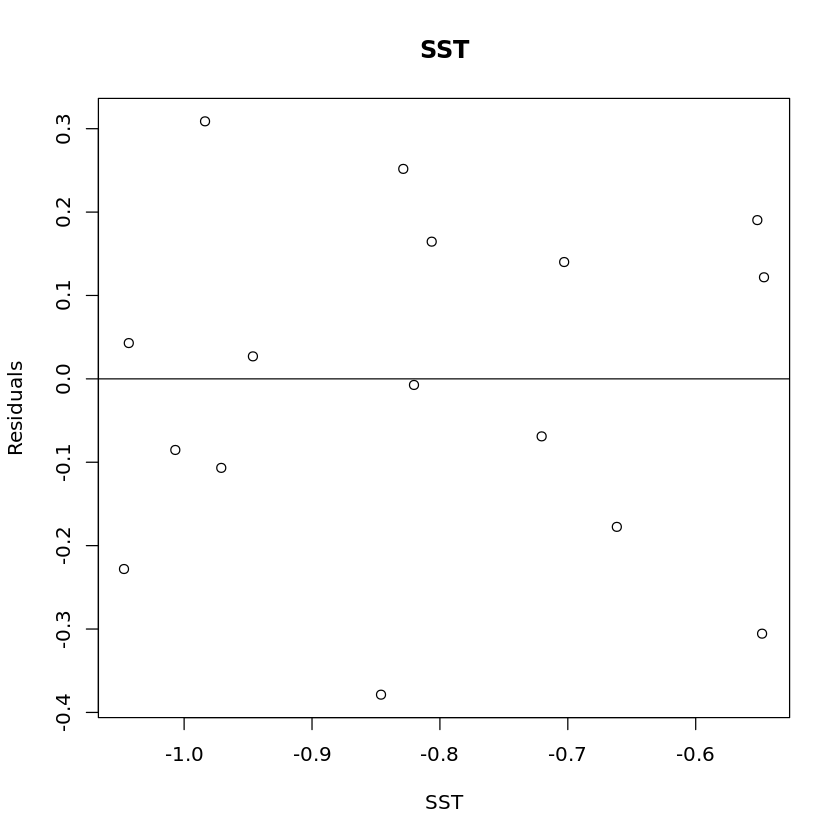

In [57]:
plot(master_gr$nmSST_aw_RSP, best_mdlsat.res , ylab="Residuals", xlab="SST", main="SST") 
abline(0, 0)      

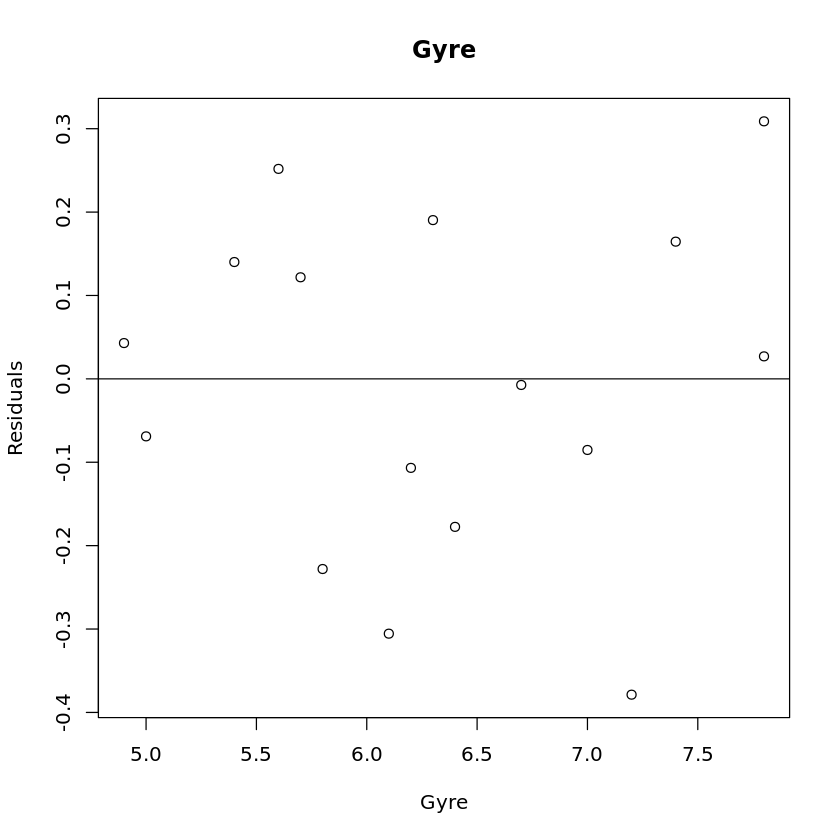

In [58]:
#Gyre
plot(master_gr$GyreSPD_lag4, best_mdlsat.res , ylab="Residuals", xlab="Gyre", main="Gyre") 
abline(0, 0) 

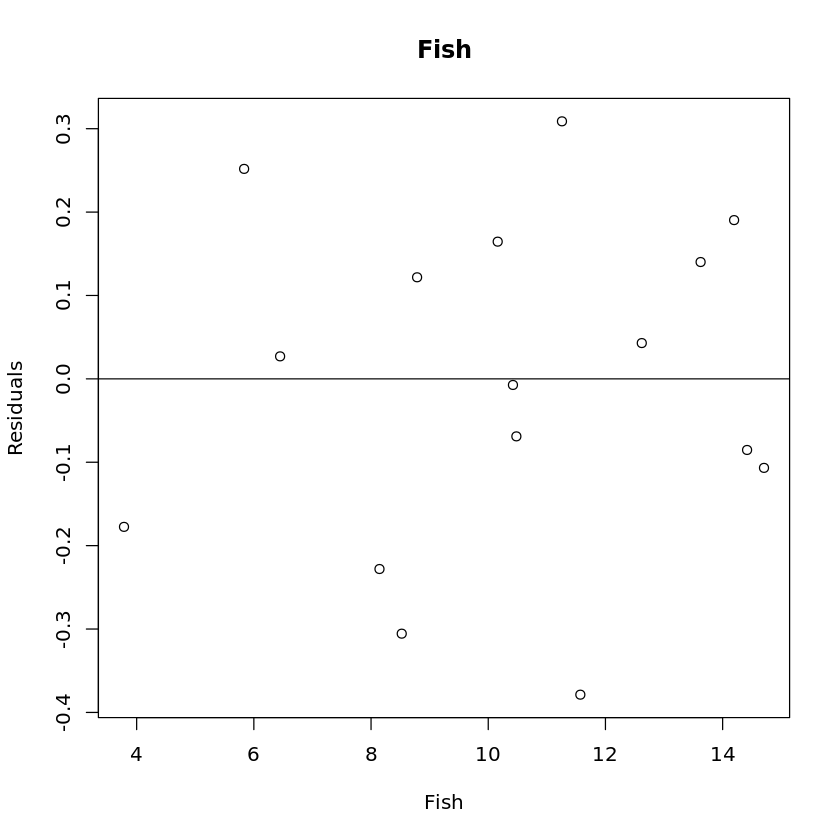

In [59]:
#Fish_cum_2_1
plot(master_gr$Fish_cum_2_1, best_mdlsat.res , ylab="Residuals", xlab="Fish", main="Fish") 
abline(0, 0)

# From here SST will be excluded due its correlation with OW and the lack of consistent hypothesis to explain its effect on penguin annual growth

# Starting the selection model 

In [60]:

cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "GyreSPD", "mnWind", "mnOW_RSP6",
                              "mnAirTemp", "Fish_cum3")]) # ,  "nmSST_aw_RSP"
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1   av_SIE  GyreSPD   mnWind  mnOW_RSP6  mnAirTemp  Fish_cum3
      -0.5356  -0.1985   0.1064  -0.0344     0.4182     0.0316     0.0117
s.e.   0.2816   0.3292   0.0963   0.1297     2.6067     0.1003     0.0079

sigma^2 estimated as 0.11:  log likelihood=-0.18
AIC=16.36   AICc=40.36   BIC=22.03

Training set error measures:
                      ME     RMSE       MAE      MPE     MAPE      MASE
Training set -0.01509896 0.242168 0.1951006 117.1034 182.1004 0.5515293
                    ACF1
Training set -0.08928298


In [61]:
coeftest(mdlsat)


z test of coefficients:

            Estimate Std. Error z value Pr(>|z|)  
ar1       -0.5356451  0.2816127 -1.9021  0.05716 .
av_SIE    -0.1984504  0.3291891 -0.6028  0.54661  
GyreSPD    0.1064090  0.0963072  1.1049  0.26921  
mnWind    -0.0343889  0.1297093 -0.2651  0.79091  
mnOW_RSP6  0.4182413  2.6066620  0.1605  0.87253  
mnAirTemp  0.0316168  0.1003289  0.3151  0.75266  
Fish_cum3  0.0116932  0.0079256  1.4754  0.14012  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [62]:
# R squared
cor(fitted(mdlsat),master_gr$growth_bird)^2

b <- lm(diff(master_gr$growth_bird) ~ diff(cov_sat_growth) - 1)
summary(b)

[1] NA


Call:
lm(formula = diff(master_gr$growth_bird) ~ diff(cov_sat_growth) - 
    1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61826 -0.30521  0.04061  0.18529  0.70290 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)
diff(cov_sat_growth)av_SIE    -0.83064    0.93713  -0.886    0.401
diff(cov_sat_growth)GyreSPD    0.12895    0.14745   0.875    0.407
diff(cov_sat_growth)mnWind     0.13182    0.17334   0.760    0.469
diff(cov_sat_growth)mnOW_RSP6  0.83033    3.74354   0.222    0.830
diff(cov_sat_growth)mnAirTemp -0.23177    0.28219  -0.821    0.435
diff(cov_sat_growth)Fish_cum3  0.01862    0.03087   0.603    0.563

Residual standard error: 0.5491 on 8 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1906,	Adjusted R-squared:  -0.4164 
F-statistic: 0.3141 on 6 and 8 DF,  p-value: 0.9123


In [63]:
#working with OW
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "GyreSPD", "mnOW_RSP6",
                               "Fish_cum3")]) # ,  "nmSST_aw_RSP"
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1   av_SIE  GyreSPD  mnOW_RSP6  Fish_cum3
      -0.4526  -0.3496   0.0923     0.5489     0.0128
s.e.   0.2626   0.1911   0.0871     2.5774     0.0079

sigma^2 estimated as 0.09078:  log likelihood=-0.36
AIC=12.73   AICc=23.23   BIC=16.97

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.01343759 0.2460053 0.2026841 24.00333 141.0689 0.5729669
                    ACF1
Training set -0.09340935


In [64]:
coeftest(mdlsat)


z test of coefficients:

           Estimate Std. Error z value Pr(>|z|)  
ar1       -0.452596   0.262599 -1.7235  0.08479 .
av_SIE    -0.349648   0.191120 -1.8295  0.06733 .
GyreSPD    0.092320   0.087134  1.0595  0.28936  
mnOW_RSP6  0.548884   2.577423  0.2130  0.83136  
Fish_cum3  0.012813   0.007948  1.6121  0.10695  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [65]:
# R squared
cor(fitted(mdlsat),master_gr$growth_bird)^2

b <- lm(diff(master_gr$growth_bird) ~ diff(cov_sat_growth) - 1)
summary(b)

[1] NA


Call:
lm(formula = diff(master_gr$growth_bird) ~ diff(cov_sat_growth) - 
    1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6181 -0.2324 -0.1301  0.2795  0.8689 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)
diff(cov_sat_growth)av_SIE    -0.31842    0.75368  -0.422    0.682
diff(cov_sat_growth)GyreSPD    0.03528    0.09984   0.353    0.731
diff(cov_sat_growth)mnOW_RSP6  0.18762    3.52269   0.053    0.959
diff(cov_sat_growth)Fish_cum3  0.02034    0.02915   0.698    0.501

Residual standard error: 0.5261 on 10 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.07103,	Adjusted R-squared:  -0.3006 
F-statistic: 0.1911 on 4 and 10 DF,  p-value: 0.9376


In [66]:
#including MCM OW

cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "GyreSPD", "mnOW_MCM6" ,
                               "Fish_cum3")]) # ,  "nmSST_aw_RSP"
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)


Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1   av_SIE  GyreSPD  mnOW_MCM6  Fish_cum3
      -0.4702  -0.3786   0.1114    27.0155     0.0124
s.e.   0.2552   0.2010   0.0620    57.6849     0.0078

sigma^2 estimated as 0.08962:  log likelihood=-0.28
AIC=12.55   AICc=23.05   BIC=16.8

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.01390282 0.2444279 0.1992512 20.91732 124.1435 0.5632626
                    ACF1
Training set -0.08683353


In [67]:
coeftest(mdlsat)


z test of coefficients:

            Estimate Std. Error z value Pr(>|z|)  
ar1       -0.4702269  0.2552356 -1.8423  0.06543 .
av_SIE    -0.3785792  0.2009821 -1.8836  0.05961 .
GyreSPD    0.1114426  0.0620353  1.7964  0.07242 .
mnOW_MCM6 27.0155013 57.6848753  0.4683  0.63955  
Fish_cum3  0.0123502  0.0078479  1.5737  0.11556  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [68]:
#including OW_days
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "GyreSPD", "logOW_day_MCM" ,
                               "Fish_cum3")]) # ,  "nmSST_aw_RSP"
mdlsat<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)


Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1   av_SIE  GyreSPD  logOW_day_MCM  Fish_cum3
      -0.3411  -0.3393   0.0837         0.0478     0.0095
s.e.   0.3111   0.1870   0.0697         0.0631     0.0095

sigma^2 estimated as 0.08808:  log likelihood=-0.08
AIC=12.17   AICc=22.67   BIC=16.42

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.008425551 0.2423196 0.2003399 34.78315 123.8465 0.5663402
                    ACF1
Training set -0.08669102


In [69]:
coeftest(mdlsat)


z test of coefficients:

                Estimate Std. Error z value Pr(>|z|)  
ar1           -0.3410934  0.3111361 -1.0963   0.2730  
av_SIE        -0.3393268  0.1870085 -1.8145   0.0696 .
GyreSPD        0.0837292  0.0696925  1.2014   0.2296  
logOW_day_MCM  0.0478209  0.0630709  0.7582   0.4483  
Fish_cum3      0.0095040  0.0095434  0.9959   0.3193  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# BEST MODEL

In [70]:
#checking Crozier model
cov_sat_growth_top<-as.matrix(master_gr[,c("av_SIE", "GyreSPD", "Fish_cum3", "OW_day_RSPlag4")]) 
mdlTop<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth_top)
summary(mdlTop)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1   av_SIE  GyreSPD  Fish_cum3  OW_day_RSPlag4
      -0.6012  -0.3283   0.1059     0.0191         -0.0304
s.e.   0.2140   0.1504   0.0503     0.0066          0.0121

sigma^2 estimated as 0.06433:  log likelihood=2.11
AIC=7.78   AICc=18.28   BIC=12.03

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.008596229 0.2070872 0.1650109 135.8589 182.0442 0.4664688
                    ACF1
Training set -0.04803865


In [71]:
coeftest(mdlTop)


z test of coefficients:

                 Estimate Std. Error z value Pr(>|z|)   
ar1            -0.6012129  0.2139571 -2.8100 0.004955 **
av_SIE         -0.3282829  0.1503541 -2.1834 0.029006 * 
GyreSPD         0.1059130  0.0503033  2.1055 0.035249 * 
Fish_cum3       0.0191236  0.0066223  2.8878 0.003880 **
OW_day_RSPlag4 -0.0304361  0.0121025 -2.5148 0.011908 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [72]:
save(mdlTop, master_gr,file="~/Workspace/Anthropocene/data/Bird_topModel.RData")

In [73]:
## Let's create the calc_R2 function
## We will define it as the usual OLS, even though it includes the ARIMA component, which is technically not a covariate
calc_R2<-function(mdl){
    tdf<-data.frame(y=mdl$x, resid=mdl$residuals)
    tdf<-na.omit(tdf)
    ymean<-mean(tdf$y)
    tdf$sseY<-(tdf$y-ymean)^2
    ssT<-sum(tdf$sseY)
    ssE<-sum(tdf$resid^2)
    n<-nrow(tdf)
    p<-length(mdl$coef)
    rSq<-1-(ssE/ssT)
    adrSq<-1 - ((ssE/(n-p))/(ssT/(n-1)))
    print(paste("R-squared:",round(rSq,3),"   Adjusted R-squared:",round(adrSq,3)))
}


In [74]:
calc_R2(mdlTop)

[1] "R-squared: 0.505    Adjusted R-squared: 0.307"


In [75]:
## Reduced models; no SIE
cov_sat_growth<-as.matrix(master_gr[,c("GyreSPD", "Fish_cum3", "OW_day_RSPlag4")]) # "mnOW_RSP6",  "mnWind",   "mnAirTemp",
mdl_noSIE<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdl_noSIE)
coeftest(mdl_noSIE)
calc_R2(mdl_noSIE)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  GyreSPD  Fish_cum3  OW_day_RSPlag4
      -0.4375   0.0002     0.0095         -0.0324
s.e.   0.2493   0.0193     0.0059          0.0147

sigma^2 estimated as 0.07651:  log likelihood=0.21
AIC=9.57   AICc=16.24   BIC=13.11

Training set error measures:
                      ME     RMSE      MAE      MPE     MAPE      MASE
Training set -0.01462379 0.236866 0.181457 49.59714 125.4473 0.5129602
                    ACF1
Training set -0.02672419



z test of coefficients:

                  Estimate  Std. Error z value Pr(>|z|)  
ar1            -0.43754006  0.24927687 -1.7552  0.07922 .
GyreSPD         0.00018056  0.01929938  0.0094  0.99254  
Fish_cum3       0.00946581  0.00588600  1.6082  0.10779  
OW_day_RSPlag4 -0.03235739  0.01469704 -2.2016  0.02769 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] "R-squared: 0.352    Adjusted R-squared: 0.175"


In [76]:
## Reduced models; no Gyre
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "Fish_cum3", "OW_day_RSPlag4")]) # "mnOW_RSP6",  "mnWind",   "mnAirTemp",
mdl_noGyre<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdl_noGyre)
coeftest(mdl_noGyre)
calc_R2(mdl_noGyre)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1   av_SIE  Fish_cum3  OW_day_RSPlag4
      -0.3980  -0.0270     0.0085         -0.0142
s.e.   0.2637   0.0632     0.0071          0.0107

sigma^2 estimated as 0.08164:  log likelihood=-0.44
AIC=10.89   AICc=16.89   BIC=14.75

Training set error measures:
                       ME      RMSE      MAE       MPE     MAPE      MASE
Training set -0.005428463 0.2474488 0.198299 -5.723974 317.8514 0.5605707
                    ACF1
Training set -0.08532862



z test of coefficients:

                 Estimate Std. Error z value Pr(>|z|)
ar1            -0.3979773  0.2637467 -1.5089   0.1313
av_SIE         -0.0270386  0.0631746 -0.4280   0.6687
Fish_cum3       0.0085054  0.0070825  1.2009   0.2298
OW_day_RSPlag4 -0.0142486  0.0106911 -1.3327   0.1826


[1] "R-squared: 0.246    Adjusted R-squared: 0.057"


In [77]:
## Reduced models; no Fish
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "GyreSPD", "OW_day_RSPlag4")]) # "mnOW_RSP6",  "mnWind",   "mnAirTemp",
mdl_noFish<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdl_noFish)
coeftest(mdl_noFish)
calc_R2(mdl_noFish)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1   av_SIE  GyreSPD  OW_day_RSPlag4
      -0.4418  -0.0109   0.0277         -0.0178
s.e.   0.2705   0.1404   0.0563          0.0150

sigma^2 estimated as 0.09028:  log likelihood=-1.03
AIC=12.06   AICc=18.73   BIC=15.6

Training set error measures:
                      ME      RMSE       MAE      MPE    MAPE      MASE
Training set -0.01403743 0.2573019 0.2009427 194.2671 226.591 0.5680442
                   ACF1
Training set 0.03686785



z test of coefficients:

                Estimate Std. Error z value Pr(>|z|)
ar1            -0.441818   0.270486 -1.6334   0.1024
av_SIE         -0.010921   0.140364 -0.0778   0.9380
GyreSPD         0.027650   0.056344  0.4907   0.6236
OW_day_RSPlag4 -0.017834   0.015020 -1.1873   0.2351


[1] "R-squared: 0.235    Adjusted R-squared: 0.027"


In [78]:
## Reduced models; no OWdate
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "GyreSPD", "Fish_cum3")]) 
mdl_noOWday<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdl_noOWday)
coeftest(mdl_noOWday)
calc_R2(mdl_noOWday)

Series: master_gr$growth_bird 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1   av_SIE  GyreSPD  Fish_cum3
      -0.4662  -0.3387   0.1056     0.0132
s.e.   0.2558   0.1836   0.0612     0.0077

sigma^2 estimated as 0.08269:  log likelihood=-0.39
AIC=10.77   AICc=17.44   BIC=14.31

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.01385598 0.2462459 0.2028809 14.95368 148.7812 0.5735234
                    ACF1
Training set -0.08989412



z test of coefficients:

            Estimate Std. Error z value Pr(>|z|)  
ar1       -0.4662345  0.2557639 -1.8229  0.06832 .
av_SIE    -0.3386654  0.1835740 -1.8448  0.06506 .
GyreSPD    0.1055674  0.0611926  1.7252  0.08450 .
Fish_cum3  0.0131556  0.0077454  1.6985  0.08941 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] "R-squared: 0.3    Adjusted R-squared: 0.109"


In [79]:
#intercept only
cov_sat_growth<-as.matrix(master_gr[,c(1)]) # "mnOW_RSP6",  "mnWind",  ,
mdl_intOnly<-Arima(master_gr$growth_bird,order=c(1,0,0),include.mean=F,include.drift=F)
summary(mdl_intOnly)
coeftest(mdl_intOnly)
calc_R2(mdl_intOnly)

Series: master_gr$growth_bird 
ARIMA(1,0,0) with zero mean 

Coefficients:
          ar1
      -0.3267
s.e.   0.2626

sigma^2 estimated as 0.07936:  log likelihood=-1.97
AIC=7.95   AICc=8.87   BIC=9.49

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.04064371 0.2727634 0.1989666 79.78886 175.5433 0.5624579
                    ACF1
Training set -0.09217139



z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)
ar1 -0.32674    0.26259 -1.2443   0.2134


[1] "R-squared: 0.083    Adjusted R-squared: 0.083"


In [80]:
## function to generate the data
# df is the source data.frame (master_gr)
# varv is the variable for which to construct the partial dependence plot
# meanmed indicates if fixing other variables to their mean or median value
# mdl is the model in which to evaluate the partial dependence
# type indicates if evaluating the dependence on a sequence of the predictor values or their real values
getPDdata<-function(df,varv, meanmed="mean", mdl, type="seq"){
    #get fixed values of constant vars
    cvars<-names(coef(mdl)); cvars<-cvars[which(!cvars %in% c(varv,"ar1","ar2","ar3"))]
    pddc<-sapply(cvars,function(vv,df,meanmed){
        mvv<-ifelse(meanmed=="mean",mean(df[,vv],na.rm=T),median(df[,vv],na.rm=T))
    },df=df,meanmed=meanmed)
    
    #get varying values of partial dependence var
    if(type=="seq"){
        minprv<-min(df[,varv],na.rm=T); maxprv<-max(df[,varv],na.rm=T)
        prv<-seq(minprv,maxprv,length.out=nrow(df))
    }else{
        prv<-unique(df[,varv])
    }
    pddf<-data.frame(prv=prv);names(pddf)<-varv
    
    #combine into matrix
    for(ii in 1:NROW(pddc)){
        cvn<-pddc[ii]; cvnn<-cvars[ii]
        pddf<-cbind(pddf,cvnv=rep(cvn,nrow(pddf)))
        names(pddf)<-gsub("cvnv",cvnn,names(pddf))
    }
    #must re-order as in the original matrix used to train the model
    cvars<-names(coef(mdl)); cvars<-cvars[which(!cvars %in% c("ar1","ar2","ar3"))]
    pddf<-pddf[,cvars]
    pdmx<-as.matrix(pddf)
    
    preds<-forecast(mdl,xreg=pdmx,level=80)
    plotdata<-data.frame(varv=prv,meanv=as.numeric(preds$mean),
                         lcv=as.numeric(preds$lower),ucv=as.numeric(preds$upper))
    names(plotdata)<-gsub("varv",varv,names(plotdata))
    return(plotdata)
}



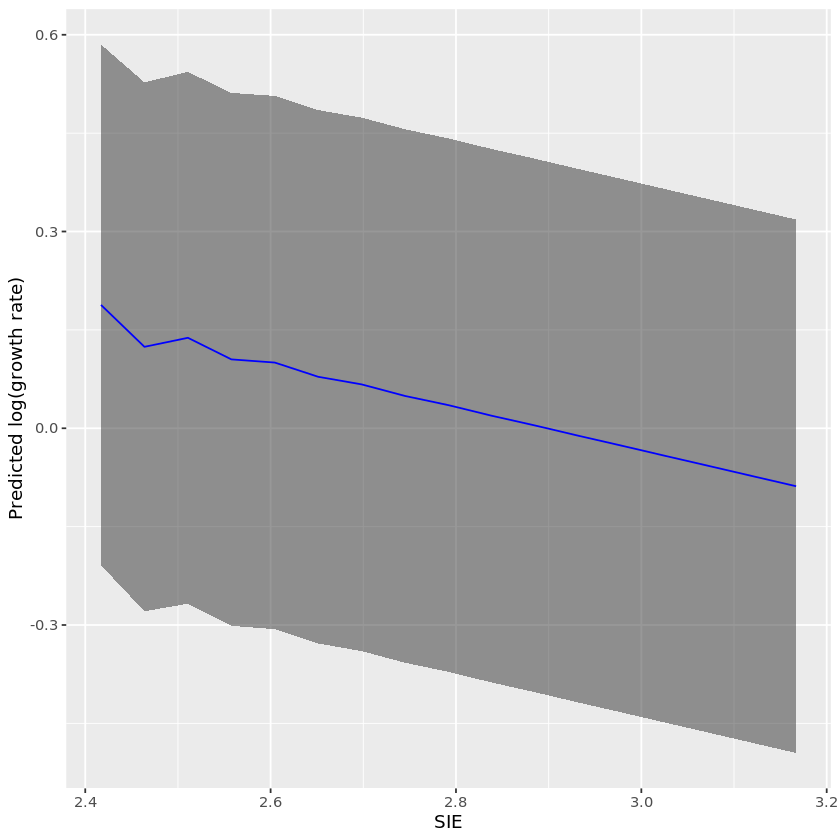

In [81]:
##"av_SIE", "GyreSPD", "Fish_cum3", "OW_day_RSPlag4"
pdat_sie<-getPDdata(df=master_gr,varv="av_SIE",mdl=mdlTop)
ggplot(pdat_sie,aes(x=av_SIE,y=meanv)) + geom_ribbon(aes(ymin=lcv,ymax=ucv),alpha=0.5) + geom_line(color="blue") +
    labs(x="SIE", y = "Predicted log(growth rate)")

In [82]:
#av_SIE", "GyreSPD", "Fish_cum3", "OW_day_RSPlag4"
pdat_gysp<-getPDdata(df=master_gr,varv="GyreSPD",mdl=mdlTop)
pdat_fish<-getPDdata(df=master_gr,varv="Fish_cum3",mdl=mdlTop)
pdat_ow<-getPDdata(df=master_gr,varv="OW_day_RSPlag4",mdl=mdlTop)

In [83]:
save(pdat_sie,pdat_gysp,pdat_fish,pdat_ow,file="~/Workspace/Anthropocene/data/pdPlots_bird.RData")